# Monte Carlo

In [30]:
import numpy as np
import math
import random
import statistics
import matplotlib.pyplot as plt
import scipy.stats as si
import sympy as sy
import seaborn as sns 
import matplotlib as mpl 
from scipy.stats.mstats import gmean
plt.style.use('seaborn-darkgrid')

In [258]:
stock,_=monte(iteration=50000)

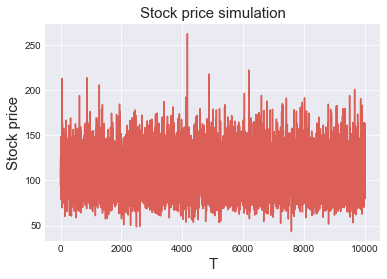

In [872]:
plt.title('Stock price simulation',size=15)
plt.plot(stock)
plt.xlabel('T',size=15)
plt.ylabel('Stock price',size=15)
plt.savefig('Stock_price_simulation.jpg',dpi=200)

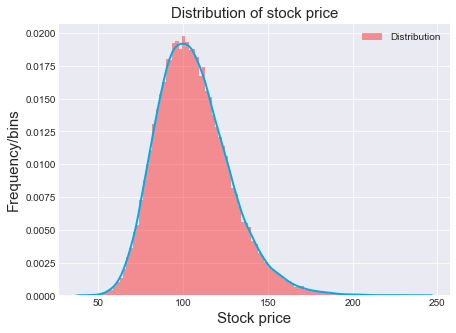

In [259]:
plt.figure(figsize=(7,5))
sns.set_palette("hls") 
mpl.rc("figure", figsize=(6,4)) 
sns.distplot(stock,bins=100,kde_kws={"color":"#00ace6", "lw":2 }, hist_kws={ "color": "#ff0000" },label='Distribution')
plt.legend()
plt.xlabel('Stock price',size=15)
plt.ylabel('Frequency/bins',size=15)
plt.title('Distribution of stock price',size=15)
plt.savefig('distribution_Stock_price_simulation.jpg',dpi=200)
plt.show()

In [387]:
plt.style.use('seaborn-darkgrid')
def black(t,S=100,K=99, r=0.06, sigma=0.2, T=1,option = 'put'):
    
    t1=T-t
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * t1) / (sigma * np.sqrt(t1))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * t1) / (sigma * np.sqrt(t1))
    
    if option == 'call':
        result = (S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * t1) * si.norm.cdf(d2, 0.0, 1.0))
    if option == 'put':
        result = (K * np.exp(-r * t1) * si.norm.cdf(-d2, 0.0, 1.0) - S * si.norm.cdf(-d1, 0.0, 1.0))
    return result, -si.norm.cdf(-d1, 0.0, 1.0), np.exp(-r * t1)*si.norm.pdf(d2, 0.0, 1.0)/(S*sigma*1)

def monte(S0=100,K=99,r=0.06,T=1,sigma=0.2,iteration=1000,option_style='put'):
#     random.seed(10)
    stock_prices = [S0*np.exp((r-0.5*sigma**2)*T+sigma*np.sqrt(T)*random.normalvariate( 0, 1)) for i in range(iteration)]
    if option_style == 'call':
        def payoff(K):
            return lambda S:(S-K) if S>K else 0
    elif option_style == 'put':
        def payoff(K):
            return lambda S:(K-S) if K>S else 0
    return stock_prices,statistics.mean(map(payoff(K),stock_prices))*np.exp(-r*T)


In [458]:
black(t=0)

(4.778969051891707, -0.3262644882651039, 0.018206369779490493)

In [261]:
Mlist=np.arange(10,50000,10)
payofflist=[monte(iteration=i)[1] for i in Mlist]

0.4502516792675075 0.25025167926750747


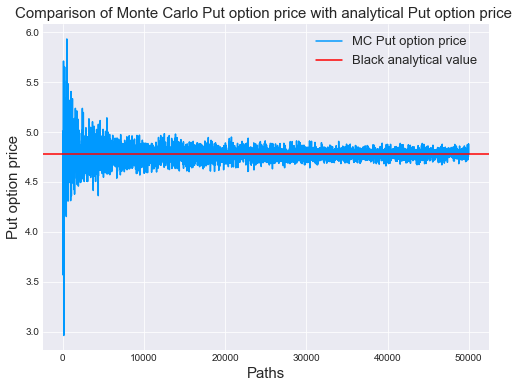

In [263]:
plt.figure(figsize=(8,6))
plt.title('Comparison of Monte Carlo Put option price with analytical Put option price ',size=15)
plt.plot(Mlist,payofflist,label='MC Put option price',color='#0099ff')
plt.axhline(black(t=0)[0],color='red',label='Black analytical value')
plt.xlabel('Paths',size=15)
plt.ylabel('Put option price',size=15)
plt.legend(fontsize=13)
plt.show()

0.4502516792675075 0.25025167926750747


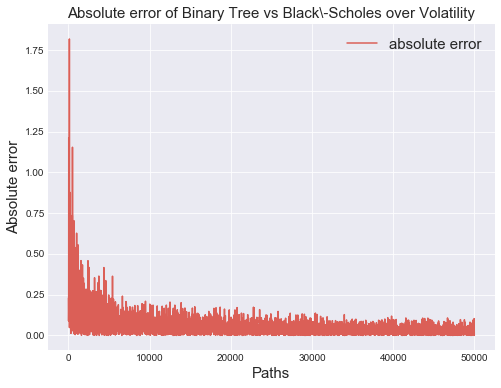

In [264]:
plt.figure(figsize=(8,6))
plt.plot(Mlist,abs((np.array(payofflist)-black(t=0)[0])),label='absolute error')
plt.title('Absolute error of Binary Tree vs Black\-Scholes over Volatility',size=15)
plt.xlabel('Paths',size=15)
plt.ylabel('Absolute error',size=15)
plt.legend(fontsize=15)
# plt.savefig('Absolute error of Binary Tree vs Black-Scholes over Volatility.jpg',dpi=200)

0.4502516792675075 0.25025167926750747
0.4502516792675075 0.25025167926750747


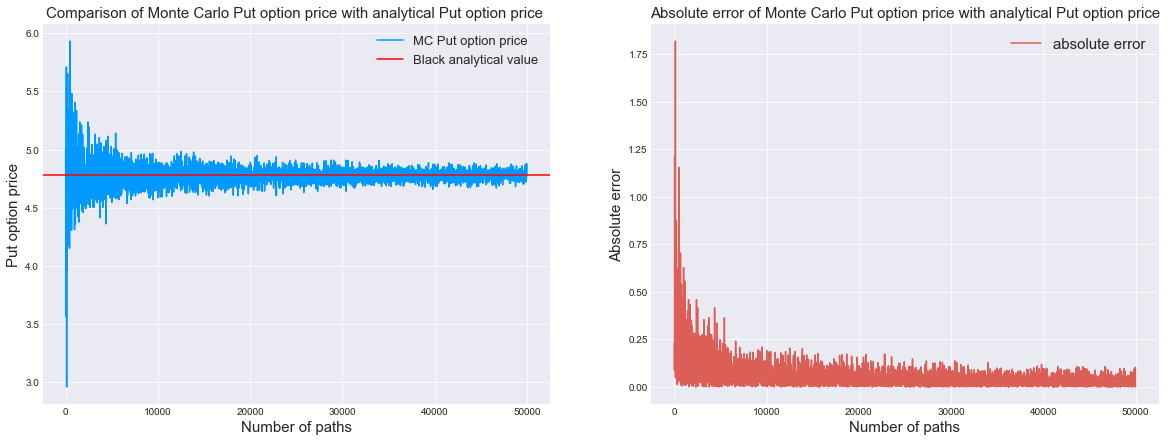

In [268]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.title('Comparison of Monte Carlo Put option price with analytical Put option price ',size=15)
plt.plot(Mlist,payofflist,label='MC Put option price',color='#0099ff')
plt.axhline(black(t=0)[0],color='red',label='Black analytical value')
plt.xlabel('Number of paths',size=15)
plt.ylabel('Put option price',size=15)
plt.legend(fontsize=13)
plt.subplot(1,2,2)
plt.plot(Mlist,abs((np.array(payofflist)-black(t=0)[0])),label='absolute error')
plt.title('Absolute error of Monte Carlo Put option price with analytical Put option price',size=15)
plt.xlabel('Number of paths',size=15)
plt.ylabel('Absolute error',size=15)
plt.legend(fontsize=15)
# plt.savefig('Asian_analytical_montecarlo.jpg',dpi=200)
plt.show()

In [271]:
Mlist=np.arange(10,50000,100)
ppplist=[]
for i in Mlist:
    payoffliststd=[monte(iteration=i)[1] for h in range(50)]
    ppplist.append(payoffliststd)

In [463]:
np.mean(ppplist[-1])
np.array([np.std(ppplist[-1])])/np.sqrt(50)

array([0.00445504])

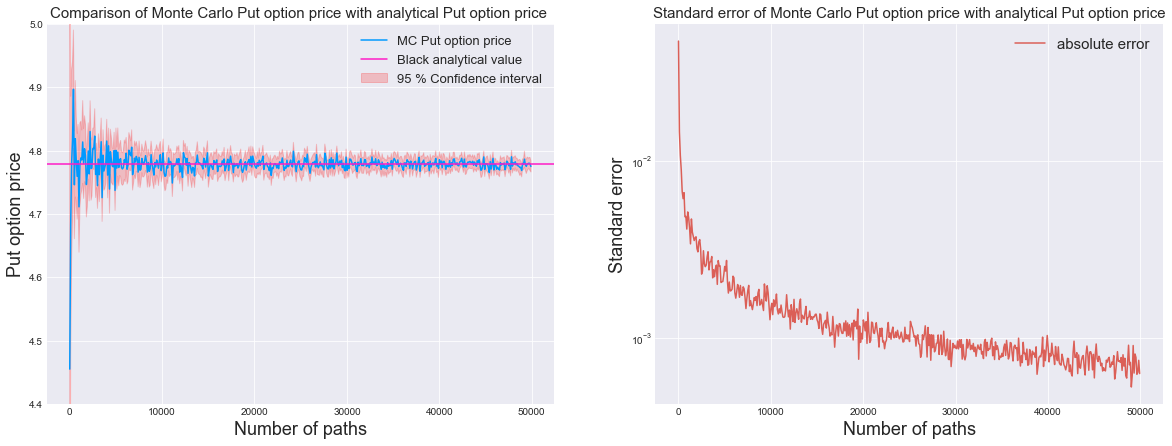

In [515]:

plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.title('Comparison of Monte Carlo Put option price with analytical Put option price ',size=15)
plt.plot(Mlist,[np.mean(ppplist[i])for i in range(len(ppplist))],label='MC Put option price',color='#0099ff')
plt.fill_between(Mlist,y1=np.array([np.mean(ppplist[i])for i in range(len(ppplist))])+(1.96*np.array([np.std(ppplist[i])for i in range(len(ppplist))])/np.sqrt(50)),y2=np.array([np.mean(ppplist[i])for i in range(len(ppplist))])-(1.96*np.array([np.std(ppplist[i])for i in range(len(ppplist))])/np.sqrt(50)),color='red',label='95 % Confidence interval',alpha=0.2)
plt.axhline(black(t=0)[0],color='#ff1ac6',label='Black analytical value')
plt.xlabel('Number of paths',size=18)
plt.ylabel('Put option price',size=18)
plt.ylim(4.4,5.0)
plt.legend(fontsize=13)
plt.subplot(1,2,2)
plt.plot(Mlist,np.array([np.std(ppplist[i])for i in range(len(ppplist))])/50,label='absolute error')
plt.title('Standard error of Monte Carlo Put option price with analytical Put option price',size=15)
plt.xlabel('Number of paths',size=18)
plt.ylabel('Standard error',size=18)
plt.legend(fontsize=15)
plt.yscale('log')
plt.savefig('Basicoption_analytical_montecarlo.jpg',dpi=200,bbox_inches='tight')
plt.show()

# change strike price

In [568]:
strikelist=np.arange(90,110,2)
Mlist=np.arange(10,8000,50)
payoff_list=[]
for h in Mlist:
    payofflist=[monte(K=i,iteration=h) for i in strikelist]
    payoff_list.append(payofflist)


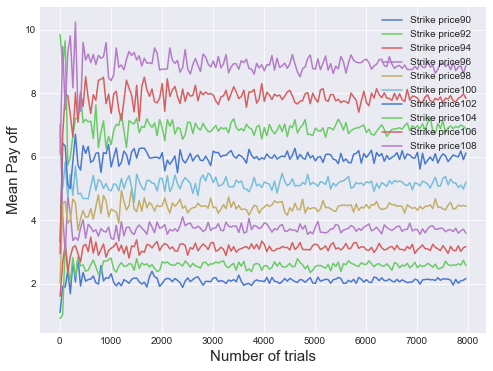

In [569]:
plt.figure(figsize=(8,6))
for h in range(len(strikelist)):
    plt.plot(Mlist,[payoff_list[i][h] for i in range(len(payoff_list))],label='Strike price'+str(strikelist[h]))
plt.xlabel('Number of trials',size=15)
plt.ylabel('Mean Pay off',size=15)
plt.legend()
plt.show()    

In [134]:
strikelist=np.arange(90,110,1)
strikemean=[]
strikestd=[]

for i in strikelist:
    kkk=[monte(K=i)[1] for h in range(2000)]
    strikemean.append(np.mean(kkk))
    strikestd.append(np.std(kkk))

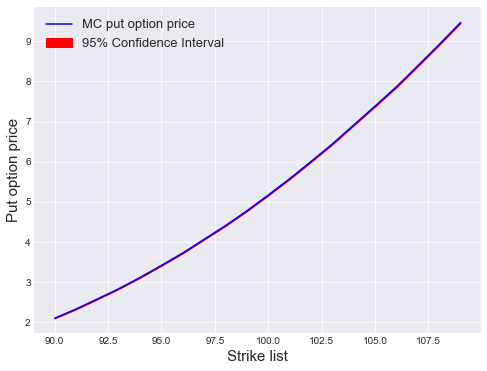

In [288]:
plt.figure(figsize=(8,6))
plt.plot(strikelist,strikemean,label='MC put option price',color='blue')
plt.fill_between(strikelist,y1=strikemean-(1.96*np.array(strikestd)/np.sqrt(2000)),y2=strikemean+(1.96*np.array(strikestd)/np.sqrt(2000)),color='red',label='95% Confidence Interval')
# plt.fill_between(strikelist,y1=strikemean+(2*np.array(strikestd)),y2=strikemean-(2*np.array(strikestd)),color='red',label='Confidence interval')
plt.xlabel('Strike list',size=15)
plt.ylabel('Put option price',size=15)
plt.legend(fontsize=13)
plt.show()

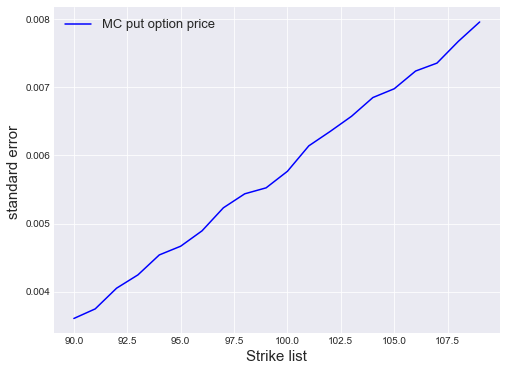

In [289]:
plt.figure(figsize=(8,6))
plt.plot(strikelist,np.array(strikestd)/np.sqrt(2000),label='MC put option price',color='blue')
# plt.fill_between(strikelist,y1=strikemean-(1.96*np.array(strikestd)/np.sqrt(1000)),y2=strikemean+(1.96*np.array(strikestd)/np.sqrt(1000)),color='red',label='95% Confidence Interval')
# plt.fill_between(strikelist,y1=strikemean+(2*np.array(strikestd)),y2=strikemean-(2*np.array(strikestd)),color='red',label='Confidence interval')
plt.xlabel('Strike list',size=15)
plt.ylabel('standard error ',size=15)
plt.legend(fontsize=13)
plt.show()

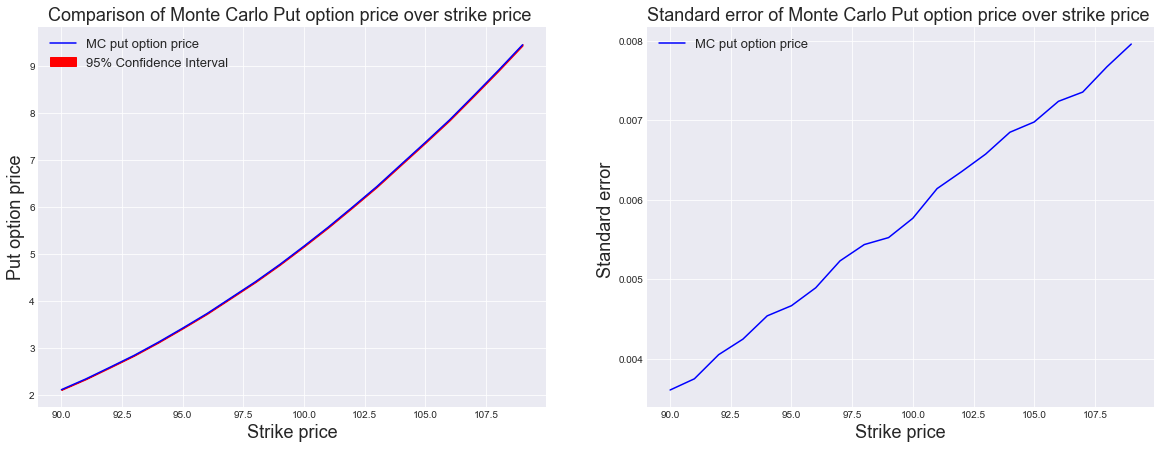

In [419]:

plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.title('Comparison of Monte Carlo Put option price over strike price ',size=18)
plt.plot(strikelist,strikemean,label='MC put option price',color='blue')
plt.fill_between(strikelist,y1=strikemean-(1.96*np.array(strikestd)/np.sqrt(2000)),y2=strikemean+(1.96*np.array(strikestd)/np.sqrt(2000)),color='red',label='95% Confidence Interval')
# plt.fill_between(strikelist,y1=strikemean+(2*np.array(strikestd)),y2=strikemean-(2*np.array(strikestd)),color='red',label='Confidence interval')
plt.xlabel('Strike price',size=18)
plt.ylabel('Put option price',size=18)
plt.legend(fontsize=13)
plt.subplot(1,2,2)
plt.title('Standard error of Monte Carlo Put option price over strike price ',size=18)
plt.plot(strikelist,np.array(strikestd)/np.sqrt(2000),label='MC put option price',color='blue')
plt.xlabel('Strike price',size=18)
plt.ylabel('Standard error ',size=18)
plt.legend(fontsize=13)
plt.savefig('Basicoption__montecarlo_strike_price.jpg',dpi=200,bbox_inches='tight')
plt.show()

# Change volatility

In [571]:
volatility=np.arange(0.1,1,0.1)
Mlist=np.arange(10,8000,50)
volatility_payoff_list=[]
for h in Mlist:
    payofflist=[monte(sigma=i,iteration=h) for i in volatility]
    volatility_payoff_list.append(payofflist)

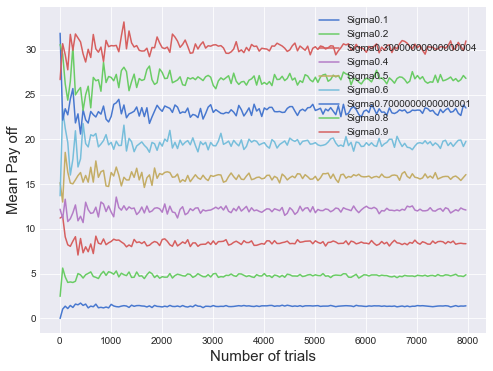

In [576]:
plt.figure(figsize=(8,6))
for h in range(len(volatility)):
    plt.plot(Mlist,[volatility_payoff_list[i][h] for i in range(len(volatility_payoff_list))],label='Sigma'+str(volatility[h]))
plt.xlabel('Number of trials',size=15)
plt.ylabel('Mean Pay off',size=15)
plt.legend()
plt.show()    

In [139]:
volatility=np.arange(0.1,1,0.1)
volatilitymean=[]
volatilitystd=[]
for i in volatility:
    kkk=[monte(sigma=i)[1] for h in range(2000)]
    volatilitymean.append(np.mean(kkk))
    volatilitystd.append(np.std(kkk))

In [143]:
volatilitystd

[0.10002134962364392,
 0.25098135848261094,
 0.3902667981087418,
 0.5243337263395378,
 0.6149802647470621,
 0.7086214503774432,
 0.7957168164021777,
 0.8510960344706816,
 0.9243706111582386]

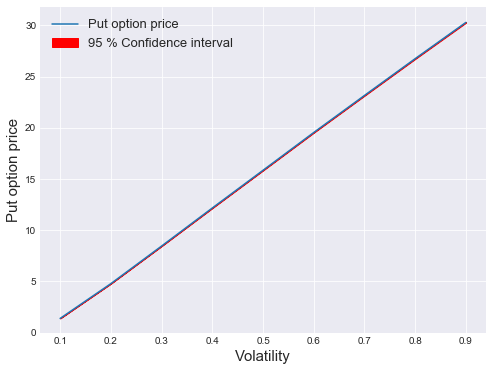

In [141]:
plt.figure(figsize=(8,6))
plt.plot(volatility,volatilitymean,label='Put option price')
plt.fill_between(volatility,y1=volatilitymean+(1.96*np.array(volatilitystd)/np.sqrt(2000)),y2=volatilitymean-(1.96*np.array(volatilitystd)/np.sqrt(2000)),color='red',label='95 % Confidence interval')
# plt.axhline(black(0),color='red',label='Black analytical value')
plt.xlabel('Volatility',size=15)
plt.ylabel('Put option price',size=15)
plt.legend(fontsize=13)
plt.show()

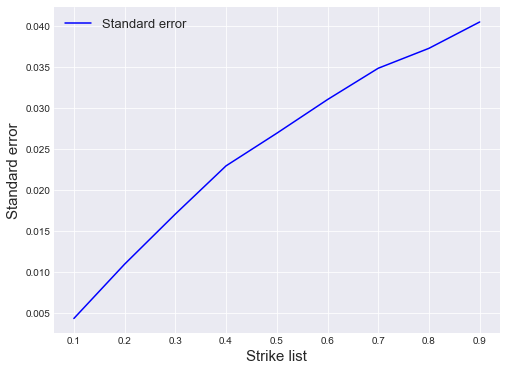

In [146]:
plt.figure(figsize=(8,6))
plt.plot(volatility,np.array(volatilitystd)/np.sqrt(2000),label='Standard error',color='blue')
# plt.fill_between(strikelist,y1=strikemean-(1.96*np.array(strikestd)/np.sqrt(1000)),y2=strikemean+(1.96*np.array(strikestd)/np.sqrt(1000)),color='red',label='95% Confidence Interval')
# plt.fill_between(strikelist,y1=strikemean+(2*np.array(strikestd)),y2=strikemean-(2*np.array(strikestd)),color='red',label='Confidence interval')
plt.xlabel('Strike list',size=15)
plt.ylabel('Standard error',size=15)
plt.legend(fontsize=13)
plt.show()

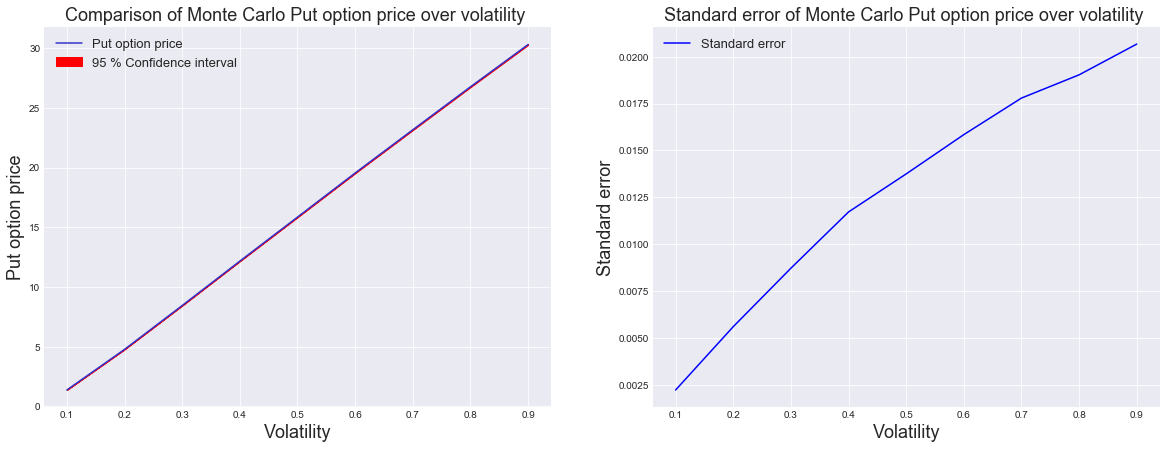

In [421]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.title('Comparison of Monte Carlo Put option price over volatility ',size=18)
plt.plot(volatility,volatilitymean,label='Put option price',color='#3333cc')
plt.fill_between(volatility,y1=volatilitymean+(1.96*np.array(volatilitystd)/np.sqrt(2000)),y2=volatilitymean-(1.96*np.array(volatilitystd)/np.sqrt(2000)),color='red',label='95 % Confidence interval')
# plt.axhline(black(0),color='red',label='Black analytical value')
plt.xlabel('Volatility',size=18)
plt.ylabel('Put option price',size=18)
plt.legend(fontsize=13)
plt.subplot(1,2,2)
plt.title('Standard error of Monte Carlo Put option price over volatility ',size=18)
plt.plot(volatility,np.array(volatilitystd)/np.sqrt(2000),label='Standard error',color='blue')
plt.xlabel('Volatility',size=18)
plt.ylabel('Standard error',size=18)
plt.legend(fontsize=13)
plt.savefig('Basicoption_montecarlo_volatility.jpg',dpi=200,bbox_inches='tight')
plt.show()

# Sensitivities

In [465]:
def montecarlo_simulation_put(S=100, v=0.2, r=0.06, T=1, K=99, sim=1000, seed=None):
    if seed is not None:
        np.random.seed(seed)
    # Compute stock prices at time T using geometric Brownian motion
    prices = S * np.exp((r - 0.5 * v**2) * T + v * np.sqrt(T) * np.random.normal(size=sim))
    
    # Determine payoffs
    payoffs = K - prices
    payoffs[payoffs < 0] = 0
    
    # Compute MC estimate and standard error
    price = math.exp(-r * T) * payoffs.mean()
    std_error = payoffs.std() / math.sqrt(sim)
    
    return price, std_error

In [466]:
e=0.01
deltalist_same_seed=[]
for i in np.arange(100,50000,50):
    deltalist_ttt=[]
    for h in range(50):
        price= montecarlo_simulation_put(S=100,seed=h,sim=i)[0]
        price_e = montecarlo_simulation_put(S=100+e,seed=h,sim=i)[0]
        delta = (price_e - price) / e
        deltalist_ttt.append(delta)
    deltalist_same_seed.append(deltalist_ttt)

In [471]:
same_seed_mean=[np.mean(deltalist_same_seed[i])for i in range(len(deltalist_same_seed))]
same_seed_std=[np.std(deltalist_same_seed[i])for i in range(len(deltalist_same_seed))]

In [483]:
same_seed_std[-1]/np.sqrt(50)

0.0002098476161759674

In [467]:
e=0.01
deltalist_different_seed=[]
for i in np.arange(100,50000,50):
    deltalist_ttt=[]
    for h in range(50):
        price= montecarlo_simulation_put(S=100,sim=i)[0]
        price_e = montecarlo_simulation_put(S=100+e,sim=i)[0]
        delta = (price_e - price) / e
        deltalist_ttt.append(delta)
    deltalist_different_seed.append(deltalist_ttt)

In [472]:
different_seed_mean=[np.mean(deltalist_different_seed[i])for i in range(len(deltalist_different_seed))]
different_seed_std=[np.std(deltalist_different_seed[i])for i in range(len(deltalist_different_seed))]

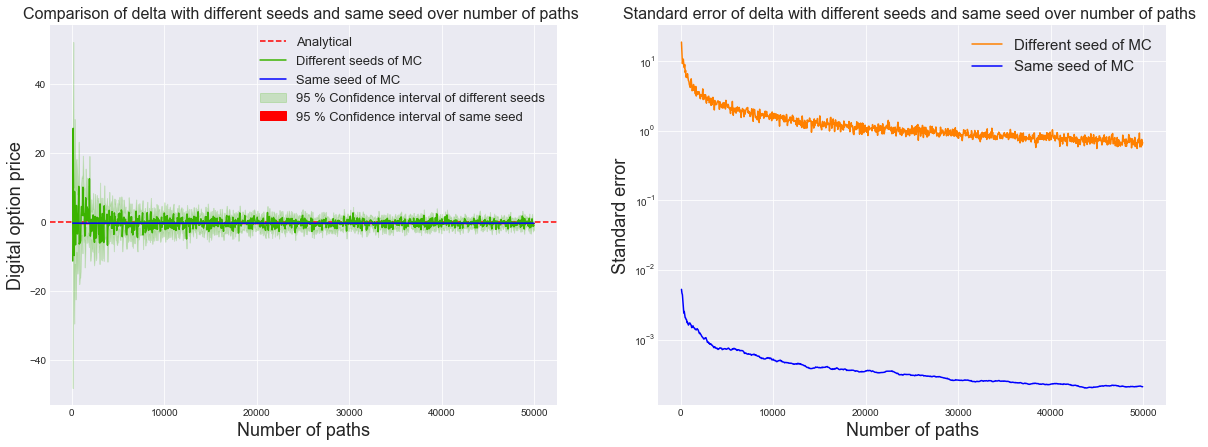

In [532]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.title('Comparison of delta with different seeds and same seed over number of paths ',size=16)
plt.axhline(y=0.01821, ls='--',label='Analytical',color='red')
plt.plot(np.arange(100,50000,50),different_seed_mean,label='Different seeds of MC',color='#3bb300')
plt.fill_between(np.arange(100,50000,50),y1=different_seed_mean+(1.96*np.array(different_seed_std)/np.sqrt(50)),y2=different_seed_mean-(1.96*np.array(different_seed_std)/np.sqrt(50)),color='#3bb300',label='95 % Confidence interval of different seeds',alpha=0.2)
plt.plot(np.arange(100,50000,50),same_seed_mean,label='Same seed of MC',color='#0000ff')
plt.fill_between(np.arange(100,50000,50),y1=same_seed_mean+(1.96*np.array(same_seed_std)/np.sqrt(50)),y2=same_seed_mean-(1.96*np.array(same_seed_std)/np.sqrt(50)),color='red',label='95 % Confidence interval of same seed')
plt.xlabel('Number of paths',size=18)
plt.ylabel('Digital option price',size=18)
plt.legend(fontsize=13)
plt.subplot(1,2,2)
plt.title('Standard error of delta with different seeds and same seed over number of paths ',size=16)
plt.plot(np.arange(100,50000,50),np.array(different_seed_std)/np.sqrt(50),label='Different seed of MC',color='#ff8000')
plt.plot(np.arange(100,50000,50),np.array(same_seed_std)/np.sqrt(50),label='Same seed of MC',color='#0000ff')
plt.xlabel('Number of paths',size=18)
plt.ylabel('Standard error',size=18)
plt.legend(fontsize=15)
plt.yscale('log')
plt.savefig('MC_convergence_same_seed.jpg',dpi=200,bbox_inches='tight')
plt.show()

In [148]:
sim_sizes = [10**i for i in [4, 5, 6, 7]]
epsilons = [0.01, 0.02, 0.5]

In [404]:
# seed_1 = 850
# seed_2 = 900
deltasum=[]
for e in epsilons:
    deltalist=[]
    for sim in sim_sizes:
        price= np.array([montecarlo_simulation_put(S=100,sim=sim)[0] for i in range(50)])
        price_e = np.array([montecarlo_simulation_put(S=100+e,sim=sim)[0] for i in range(50)])
        delta = (price_e - price) / e
        deltalist.append(np.mean(delta))
    deltasum.append(deltalist)

In [405]:
relative_error_1=abs((np.array(deltasum)-(-0.3262644882651039))/-0.3262644882651039)*100
relative_error_1

array([[386.67306538, 102.25748318,  77.99134156,  13.88830665],
       [501.46032417, 119.05202209,  12.02407225,   2.12498956],
       [ 10.26851631,   0.89428113,   1.74518045,   1.62648529]])

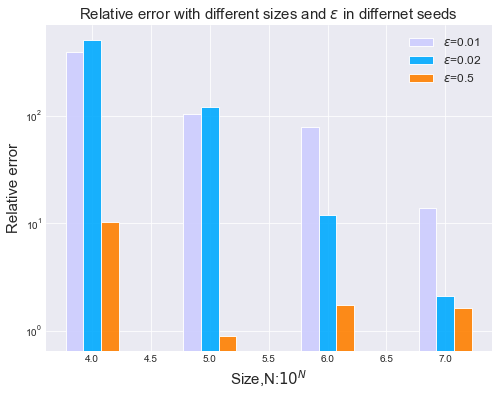

In [406]:
plt.figure(figsize=(8,6))
plt.bar(np.array([4,5,6,7])-0.15,relative_error_1[0], alpha=0.9, width = 0.15, facecolor = '#ccccff', edgecolor = 'white', label='$\epsilon$=0.01', lw=1)
plt.bar(np.array([4,5,6,7]),relative_error_1[1], alpha=0.9, width = 0.15, facecolor = '#00aaff', edgecolor = 'white', label='$\epsilon$=0.02', lw=1)
plt.bar(np.array([4,5,6,7])+0.15,relative_error_1[2], alpha=0.9, width = 0.15, facecolor = '#ff8000', edgecolor = 'white', label='$\epsilon$=0.5', lw=1)
plt.title('Relative error with different sizes and $\epsilon$ in differnet seeds',size=15)
plt.xlabel('Size,N:$10^N$',size=15)
plt.ylabel('Relative error',size=15)
plt.yscale('log')
plt.legend(fontsize='large')
plt.show()

In [407]:

deltasum_1=[]
for e in epsilons:
    deltalist=[]
    for sim in sim_sizes:
        price= np.array([montecarlo_simulation_put(S=100,sim=sim,seed=i)[0] for i in range(50)])
        price_e = np.array([montecarlo_simulation_put(S=100+e,sim=sim,seed=i)[0] for i in range(50)])
        delta = (price_e - price) / e
        deltalist.append(np.mean(delta))
    deltasum_1.append(deltalist)

In [468]:
deltasum_1

[[-0.32616018754902854,
  -0.32603222577206914,
  -0.3261715443825519,
  -0.32616788116367523],
 [-0.32606985135445754,
  -0.32594535239833616,
  -0.3260818754518277,
  -0.3260781544279645],
 [-0.3217491403426945,
  -0.32167473840946925,
  -0.32177610255854305,
  -0.3217789629280915]]

In [408]:
relative_error_2=abs((np.array(deltasum_1)-(-0.3262644882651039))/-0.3262644882651039)*100
relative_error_2

array([[0.03196815, 0.07118841, 0.02848728, 0.02961006],
       [0.05965617, 0.09781508, 0.05597079, 0.05711128],
       [1.38395323, 1.40675741, 1.37568932, 1.37481261]])

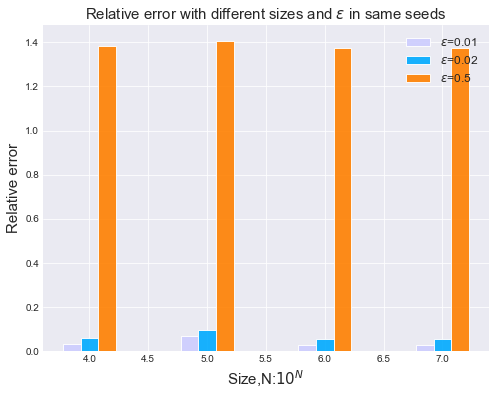

In [409]:
plt.figure(figsize=(8,6))
plt.bar(np.array([4,5,6,7])-0.15,relative_error_2[0], alpha=0.9, width = 0.15, facecolor = '#ccccff', edgecolor = 'white', label='$\epsilon$=0.01', lw=1)
plt.bar(np.array([4,5,6,7]),relative_error_2[1], alpha=0.9, width = 0.15, facecolor = '#00aaff', edgecolor = 'white', label='$\epsilon$=0.02', lw=1)
plt.bar(np.array([4,5,6,7])+0.15,relative_error_2[2], alpha=0.9, width = 0.15, facecolor = '#ff8000', edgecolor = 'white', label='$\epsilon$=0.5', lw=1)
plt.title('Relative error with different sizes and $\epsilon$ in same seeds',size=15)
plt.xlabel('Size,N:$10^N$',size=15)
plt.ylabel('Relative error',size=15)
plt.legend(fontsize='large')
plt.show()

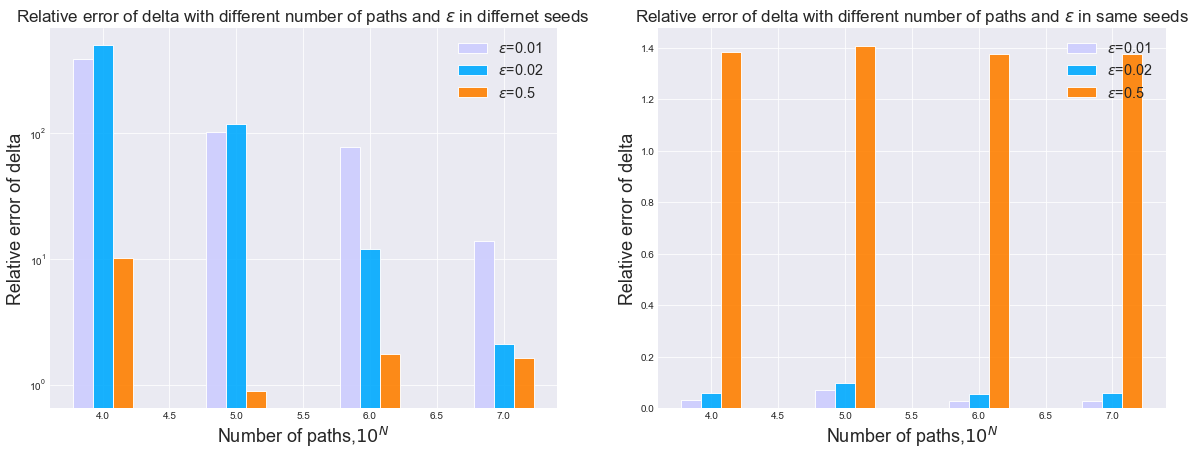

In [423]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.bar(np.array([4,5,6,7])-0.15,relative_error_1[0], alpha=0.9, width = 0.15, facecolor = '#ccccff', edgecolor = 'white', label='$\epsilon$=0.01', lw=1)
plt.bar(np.array([4,5,6,7]),relative_error_1[1], alpha=0.9, width = 0.15, facecolor = '#00aaff', edgecolor = 'white', label='$\epsilon$=0.02', lw=1)
plt.bar(np.array([4,5,6,7])+0.15,relative_error_1[2], alpha=0.9, width = 0.15, facecolor = '#ff8000', edgecolor = 'white', label='$\epsilon$=0.5', lw=1)
plt.title('Relative error of delta with different number of paths and $\epsilon$ in differnet seeds',size=17)
plt.xlabel('Number of paths,$10^N$',size=18)
plt.ylabel('Relative error of delta',size=18)
plt.yscale('log')
plt.legend(fontsize='x-large')
plt.subplot(1,2,2)
plt.bar(np.array([4,5,6,7])-0.15,relative_error_2[0], alpha=0.9, width = 0.15, facecolor = '#ccccff', edgecolor = 'white', label='$\epsilon$=0.01', lw=1)
plt.bar(np.array([4,5,6,7]),relative_error_2[1], alpha=0.9, width = 0.15, facecolor = '#00aaff', edgecolor = 'white', label='$\epsilon$=0.02', lw=1)
plt.bar(np.array([4,5,6,7])+0.15,relative_error_2[2], alpha=0.9, width = 0.15, facecolor = '#ff8000', edgecolor = 'white', label='$\epsilon$=0.5', lw=1)
plt.title('Relative error of delta with different number of paths and $\epsilon$ in same seeds',size=17)
plt.xlabel('Number of paths,$10^N$',size=18)
plt.ylabel('Relative error of delta',size=18)
plt.legend(fontsize='x-large')
plt.savefig('Seed_comparison_delta.jpg',dpi=200,bbox_inches='tight')
plt.show()

# Digital

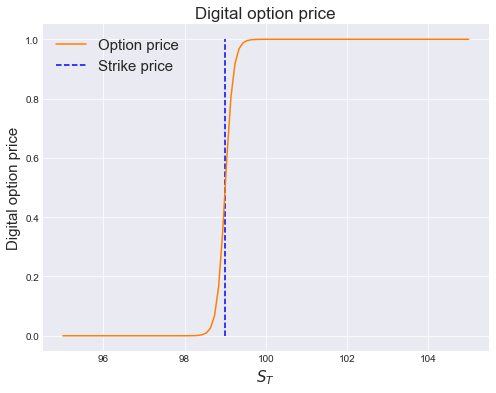

In [328]:
def digital_smooth(S_N, K=99, payoff=1):
    return payoff / (1 + np.exp((K - S_N)*10))
plt.figure(figsize=(8,6))
plt.plot(np.linspace(95, 105, 100), digital_smooth(np.linspace(95, 105, 100)),label='Option price',color='#ff8000')
plt.title('Digital option price',size=17)
plt.vlines(99,ymin=0, ymax=1,linestyles='dashed',label='Strike price',color='blue')
plt.xlabel('$S_T$',size=15)
plt.ylabel('Digital option price',size=15)
plt.legend(fontsize=15)
plt.savefig('Digital_option.jpg',dpi=200)

In [331]:
def montecarlo_simulation_binary(S=100, v=0.2, r=0.06, T=1, K=99, sim=1000, seed=None):

    if seed is not None:
        np.random.seed(seed)
        
    prices = S * np.exp((r - 0.5 * v**2) * T + v * np.sqrt(T) * np.random.normal(size=sim))
    
    # Determine payoffs
    payoffs = prices - K
    payoffs[payoffs < 0] = 0
    payoffs[payoffs > 0] = 1
    
    # Compute MC estimate and standard error
    price = math.exp(-r * T) * payoffs.mean()
    std_error = payoffs.std() / math.sqrt(sim)
    
    return price, std_error

def montecarlo_simulation_binary_likelihood(S=100, v=0.2, r=0.06, T=1, K=99, sim=10000, seed=None):

    if seed is not None:
        np.random.seed(seed)
        
    rnd = np.random.normal(size=sim)
    
    prices = S * np.exp((r - 0.5 * v**2) * T + v * np.sqrt(T) * rnd)
    
    # Determine payoffs
    payoffs = prices - K
    payoffs[payoffs < 0] = 0
    payoffs[payoffs > 0] = 1
    
    # Determine deltas
    deltas = math.exp(-r * T) * payoffs * rnd / (v * S * math.sqrt(T))
    
    # Average deltas
    delta = deltas.mean()
    
    return delta

In [358]:
sim_sizes = [10**i for i in [4, 5, 6, 7]]
epsilons = [0.01, 0.02, 0.5]
e=0.01

In [ ]:
deltalist_digit=[]
for i in np.arange(100,50000,50):
    deltalist_ttt=[]
    for h in range(50):
        price, _ = montecarlo_simulation_binary(S=100,seed=h,sim=i)
        price_e, _ = montecarlo_simulation_binary(S=100+e,seed=h,sim=i)
        delta = (price_e - price) / e
        deltalist_ttt.append(delta)
    deltalist_digit.append(deltalist_ttt)

In [360]:

binarymean=[np.mean(deltalist_digit[i]) for i in range(len(deltalist_digit))]
binarystd=[np.std(deltalist_digit[i]) for i in range(len(deltalist_digit))]

In [491]:
binarystd[-1]/np.sqrt(50)

0.0007981340538762411

In [350]:
deltalist_fancy=[]
for i in np.arange(100,50000,50):
    deltattt=[montecarlo_simulation_binary_likelihood(sim=i) for h in range(50)]
    deltalist_fancy.append(deltattt)

In [354]:
likelimean=[np.mean(deltalist_fancy[i]) for i in range(len(deltalist_fancy))]
likelistd=[np.std(deltalist_fancy[i]) for i in range(len(deltalist_fancy))]

In [488]:
likelistd[-1]/np.sqrt(50)

1.8747892433520582e-05

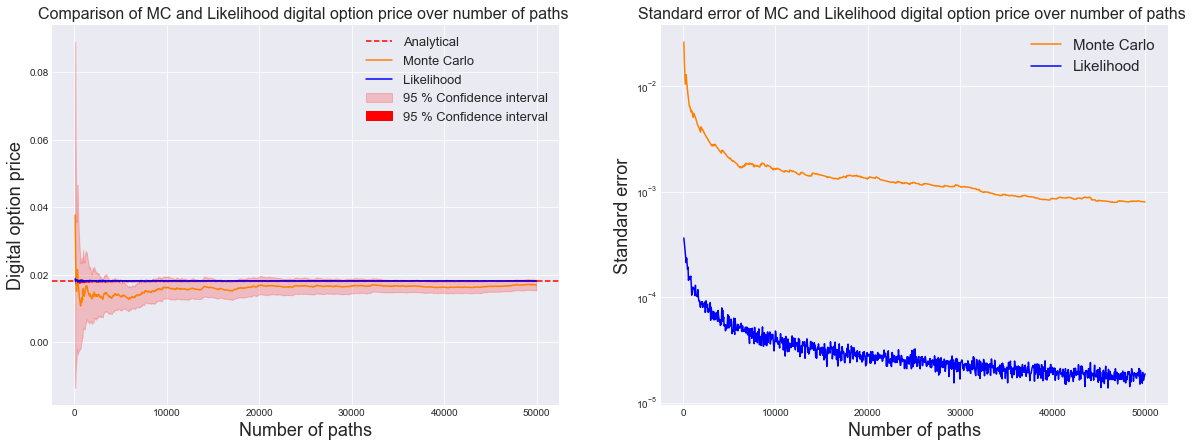

In [533]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.title('Comparison of MC and Likelihood digital option price over number of paths ',size=16)
plt.axhline(y=0.01821, ls='--',label='Analytical',color='red')
plt.plot(np.arange(100,50000,50),binarymean,label='Monte Carlo',color='#ff8000')
plt.fill_between(np.arange(100,50000,50),y1=binarymean+(1.96*np.array(binarystd)/np.sqrt(50)),y2=binarymean-(1.96*np.array(binarystd)/np.sqrt(50)),color='red',label='95 % Confidence interval',alpha=0.2)
plt.plot(np.arange(100,50000,50),likelimean,label='Likelihood',color='#0000ff')
plt.fill_between(np.arange(100,50000,50),y1=likelimean+(1.96*np.array(likelistd)/np.sqrt(50)),y2=likelimean-(1.96*np.array(likelistd)/np.sqrt(50)),color='red',label='95 % Confidence interval')
plt.xlabel('Number of paths',size=18)
plt.ylabel('Digital option price',size=18)
plt.legend(fontsize=13)
plt.subplot(1,2,2)
plt.title('Standard error of MC and Likelihood digital option price over number of paths ',size=16)
plt.plot(np.arange(100,50000,50),np.array(binarystd)/np.sqrt(50),label='Monte Carlo',color='#ff8000')
plt.plot(np.arange(100,50000,50),np.array(likelistd)/np.sqrt(50),label='Likelihood',color='#0000ff')
plt.xlabel('Number of paths',size=18)
plt.ylabel('Standard error',size=18)
plt.legend(fontsize=15)
plt.yscale('log')
plt.savefig('MC_likelihood_comparison.jpg',dpi=200,bbox_inches='tight')
plt.show()

# MC digits error

In [401]:
sim_sizes = [10**i for i in [4, 5, 6, 7]]
epsilons = [0.01, 0.02, 0.5]
MC_deltaerror=[]
for e in epsilons:
    deltalist=[]
    for sim in sim_sizes:
        price= np.array([montecarlo_simulation_binary(S=100,sim=sim, seed=h)[0]for h in range(50)])
        price_e= np.array([montecarlo_simulation_binary(S=100+ e,sim=sim,seed=h)[0] for h in range(50)])
        delta = (price_e - price) / e
        deltalist.append(np.mean(delta))
    MC_deltaerror.append(deltalist)

In [402]:
MC_deltaerror_relative=abs(np.array(MC_deltaerror)-0.018206369779490493)*100/0.018206369779490493
MC_deltaerror_relative

array([[11.02921574,  4.71849732,  0.11282317,  0.21305819],
       [ 1.71831972,  3.37359012,  0.66825755,  0.43186425],
       [ 0.64239395,  0.90723722,  0.4836949 ,  0.6073436 ]])

# Likelihood error

In [390]:
sim_sizes = [10**i for i in [4, 5, 6, 7]]
result_s_like=[]
for i in sim_sizes:
    h=[montecarlo_simulation_binary_likelihood(sim=i) for h in range(50)]
    result_s_like.append(h)

In [396]:
result_s_likemean=np.array([np.mean(result_s_like[i])for i in range(4)])
result_s_likeabserror=abs(result_s_likemean-0.018206369779490493)
result_s_likerealtiveerror=(result_s_likeabserror/0.018206369779490493)*100

In [456]:
result_s_likeabserror

array([8.83608606e-06, 1.88373278e-06, 2.26354911e-06, 2.32462619e-07])

In [397]:
result_s_likerealtiveerror

array([0.04853294, 0.01034656, 0.01243273, 0.00127682])

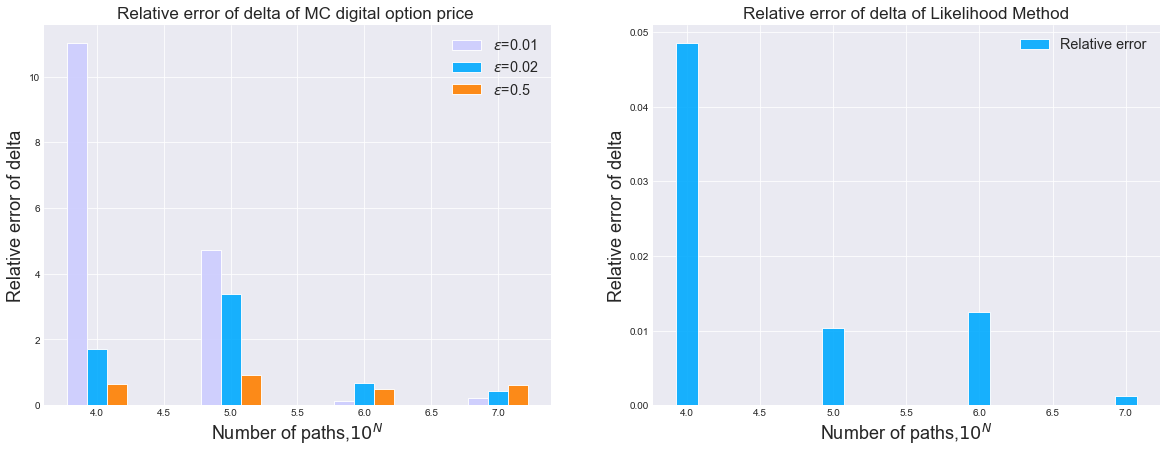

In [455]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.bar(np.array([4,5,6,7])-0.15,MC_deltaerror_relative[0], alpha=0.9, width = 0.15, facecolor = '#ccccff', edgecolor = 'white', label='$\epsilon$=0.01', lw=1)
plt.bar(np.array([4,5,6,7]),MC_deltaerror_relative[1], alpha=0.9, width = 0.15, facecolor = '#00aaff', edgecolor = 'white', label='$\epsilon$=0.02', lw=1)
plt.bar(np.array([4,5,6,7])+0.15,MC_deltaerror_relative[2], alpha=0.9, width = 0.15, facecolor = '#ff8000', edgecolor = 'white', label='$\epsilon$=0.5', lw=1)
plt.title('Relative error of delta of MC digital option price ',size=17)
plt.xlabel('Number of paths,$10^N$',size=18)
plt.ylabel('Relative error of delta',size=18)
# plt.yscale('log')
plt.legend(fontsize='x-large')
plt.subplot(1,2,2)
plt.bar(np.array([4,5,6,7]),result_s_likerealtiveerror, alpha=0.9, width = 0.15, facecolor = '#00aaff', edgecolor = 'white', label='Relative error', lw=1)
plt.title('Relative error of delta of Likelihood Method',size=17)
plt.xlabel('Number of paths,$10^N$',size=18)
plt.ylabel('Relative error of delta',size=18)
plt.legend(fontsize='x-large')
plt.savefig('digitallikeli_comparison_delta.jpg',dpi=200,bbox_inches='tight')
plt.show()

# Variance reduction

In [17]:
def Asian_black(S=100,K=99, r=0.06, sigma=0.2, T=1,option = 'call'):
    
    d1 = (np.log(S / K) + 0.5*(r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T/3))
    d2 = d1+sigma * np.sqrt(T/3)
    
    if option == 'call': 
        result = (S * np.exp(-0.5*T*(r+((sigma**2)/6)))*si.norm.cdf(d2, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d1, 0.0, 1.0))
    if option == 'put':
        result = (K * np.exp(-r * t1) * si.norm.cdf(-d2, 0.0, 1.0) - S * si.norm.cdf(-d1, 0.0, 1.0))
    return result, -si.norm.cdf(-d1, 0.0, 1.0) 


In [459]:
Asian_black()

(6.335234454843835, -0.3973379595142644)

In [57]:
def montecarlo_simulation_asian_geometric(N, sim,S=100, sigma=0.2, r=0.06, T=1, K=99, seed=None):
    if seed is not None:
        np.random.seed(seed)
    
    dt = T / N
    
    prices = np.zeros(shape=(sim, N+1))
    prices[:, 0] = S
    
    for i in range(1, N+1):
        eps = np.random.normal(size=(sim))
        prices[:, i] = prices[:, i-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * eps)

    prices = prices[:, 1:]
    
    payoffs = gmean(prices, axis=1) - K
    payoffs[payoffs < 0] = 0
    
    price = math.exp(-r * T) * payoffs.mean()
    std_error = np.std(payoffs) / math.sqrt(sim)
    
    return price

In [495]:
Aisan_mean=[]
Aisan_std=[]
for i in np.arange(100,50000,50):
    price=[montecarlo_simulation_asian_geometric(N=1000,sim=i) for h in range (50)]
    Aisan_mean.append(np.mean(price))
    Aisan_std.append(np.std(price))

KeyboardInterrupt: 

In [508]:
Aisan_std[-1]/np.sqrt(50)

0.00797185423510069

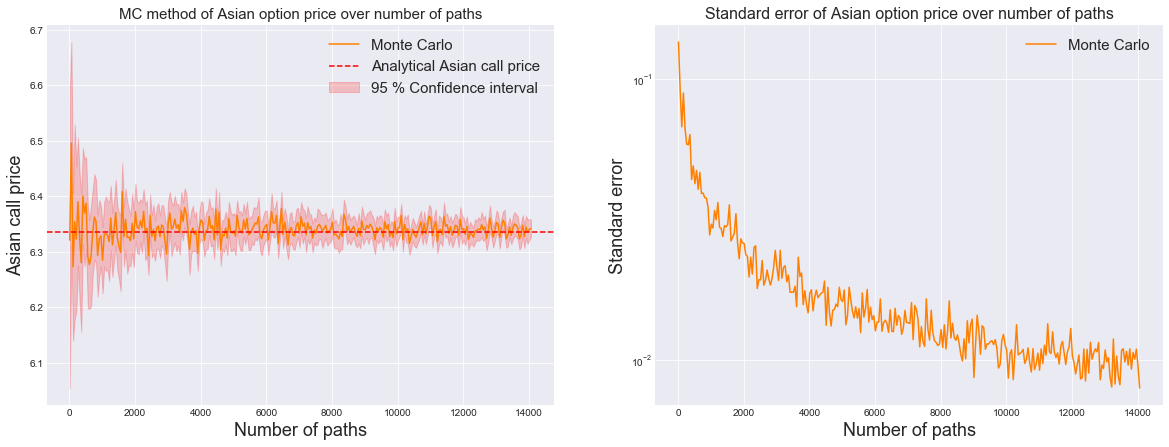

In [534]:

plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.title('MC method of Asian option price over number of paths',size=15)
plt.plot(np.arange(10,14100,50),Aisan_mean,label='Monte Carlo',color='#ff8000')
plt.fill_between(np.arange(10,14100,50),y1=Aisan_mean+(1.96*np.array(Aisan_std)/np.sqrt(50)),y2=Aisan_mean-(1.96*np.array(Aisan_std)/np.sqrt(50)),color='red',label='95 % Confidence interval',alpha=0.2)
plt.axhline(y=6.335234454843835, ls='--',label='Analytical Asian call price',color='red')
plt.xlabel('Number of paths',size=18)
plt.ylabel('Asian call price',size=18)
plt.legend(fontsize=15)
plt.subplot(1,2,2)
plt.title('Standard error of Asian option price over number of paths',size=16)
plt.plot(np.arange(10,14100,50),np.array(Aisan_std)/np.sqrt(50),label='Monte Carlo',color='#ff8000')
plt.xlabel('Number of paths',size=18)
plt.ylabel('Standard error',size=18)
plt.legend(fontsize=15)
plt.yscale('log')
plt.savefig('Asian_convergence_analytical.jpg',dpi=200,bbox_inches='tight')
plt.show()

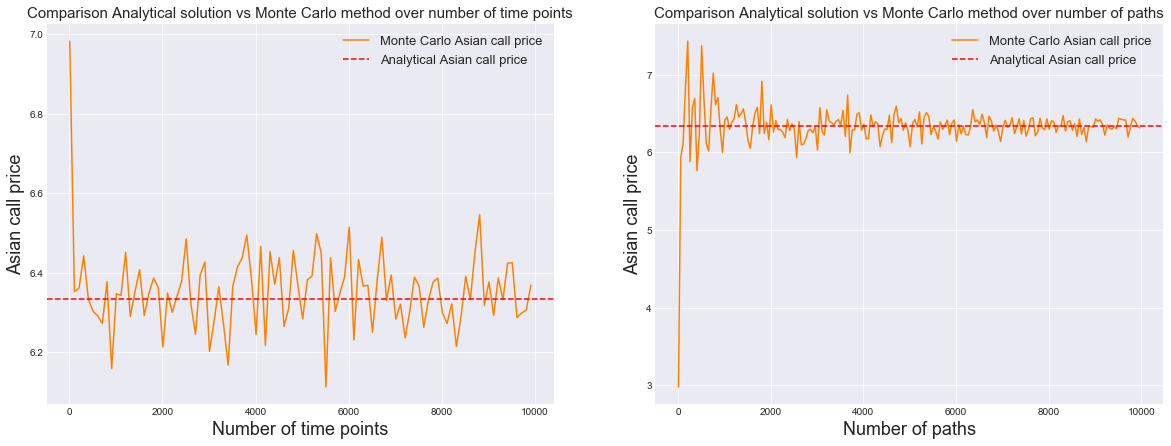

In [493]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.title('Comparison Analytical solution vs Monte Carlo method over number of time points',size=15)
plt.plot(np.arange(10,10000,100),Asianoptionprice,color='#ff8000',label='Monte Carlo Asian call price')
plt.axhline(y=6.335234454843835, ls='--',label='Analytical Asian call price',color='red')
plt.xlabel('Number of time points',size=18)
plt.ylabel('Asian call price',size=18)
plt.legend(fontsize=13)
plt.subplot(1,2,2)
plt.title('Comparison Analytical solution vs Monte Carlo method over number of paths',size=15)
plt.plot(np.arange(10,10000,50),Asianoptionprice_1,color='#ff8000',label='Monte Carlo Asian call price')
plt.axhline(y=6.335234454843835, ls='--',label='Analytical Asian call price',color='red')
plt.xlabel('Number of paths',size=18)
plt.ylabel('Asian call price',size=18)
plt.legend(fontsize=13)
# plt.savefig('Asian_analytical_montecarlo.jpg',dpi=200,bbox_inches='tight')
plt.show()

In [81]:
Asianoptionprice_1=[montecarlo_simulation_asian_geometric(1000,i) for i in np.arange(10,10000,50)]

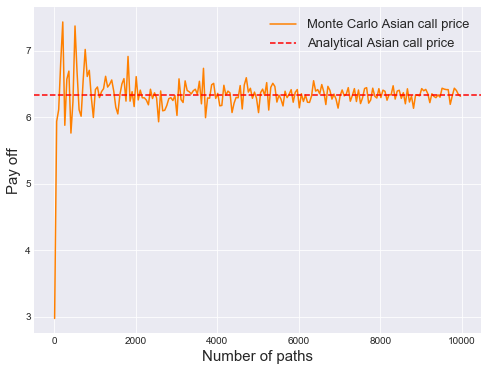

In [85]:
plt.figure(figsize=(8,6))
plt.plot(np.arange(10,10000,50),Asianoptionprice_1,color='#ff8000',label='Monte Carlo Asian call price')
plt.axhline(y=6.335234454843835, ls='--',label='Analytical Asian call price',color='red')
plt.xlabel('Number of paths',size=15)
plt.ylabel('Pay off',size=15)
plt.legend(fontsize=13)
plt.show()

In [109]:
Asianoptionprice_2=[montecarlo_simulation_asian_geometric(1000,5000) for i in range(2000)]

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(np.arange(0,2000,1),Asianoptionprice_2,color='#ff8000',label='Monte Carlo Asian call price')
plt.axhline(y=6.335234454843835, ls='--',label='Analytical Asian call price',color='red')
plt.xlabel('Number of paths',size=15)
plt.ylabel('Pay off',size=15)
plt.legend(fontsize=13)
plt.show()

# Control variate

In [442]:

def control_variate_asian(N=500, sim=1000,S=100, sigma=0.2, r=0.06, T=1, K=99, seed=None):
    if seed is not None:
        np.random.seed(seed)
    
    # Generate prices 
    dt = T / N
    
    prices = np.zeros(shape=(sim, N+1))
    prices[:, 0] = S
    
    for i in range(1, N+1):
        eps = np.random.normal(size=(sim))
        prices[:, i] = prices[:, i-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * eps)

    prices = prices[:, 1:]
    
    # Payoffs for geometric average
    geom_payoffs = gmean(prices, axis=1) - K
    geom_payoffs[geom_payoffs < 0] = 0
    
    # Payoffs for arithmetic average
    arith_payoffs = np.mean(prices, axis=1) - K
    arith_payoffs[arith_payoffs < 0] = 0
    
    # Analytic price for geometric option
    analytic_geometric = Asian_black(K=K,sigma=sigma)[0]
    
    # Control variate technique
    optim_beta = np.corrcoef(arith_payoffs, geom_payoffs)[1, 0] * arith_payoffs.std() / geom_payoffs.std()
    
    mc_geometric = math.exp(-r*T) * geom_payoffs.mean()
    mc_arithmetic = math.exp(-r*T) * arith_payoffs.mean()
    
    ctrl_var_arithmetic = mc_arithmetic - optim_beta * (mc_geometric - analytic_geometric)
    
    return ctrl_var_arithmetic, mc_arithmetic, analytic_geometric, mc_geometric

In [445]:
control_variate_asian(K=90)

(12.896710425515078,
 13.204204353762142,
 12.620058885125815,
 12.921406040767007)

# Change_sim

In [165]:
simlist=np.arange(10,10000,100)
simcontrol=[]
simmonte=[]
for i in simlist:
    k=[control_variate_asian(sim=i)[0] for h in range(50)]
    z=[control_variate_asian(sim=i)[1] for h in range(50)]
    simcontrol.append(k)
    simmonte.append(z)

In [199]:
simmean=[np.mean(simcontrol[i]) for i in range(len(simcontrol))]
simstd=[np.std(simcontrol[i]) for i in range(len(simcontrol))]
simmeanmonte=[np.mean(simmonte[i]) for i in range(len(simcontrol))]
simstdmonte=[np.std(simmonte[i]) for i in range(len(simcontrol))]

In [514]:
print(simmeanmonte[-1])
print(simstdmonte[-1]/np.sqrt(50))
print(simmeanmonte[-1]-(1.96*simstdmonte[-1]/np.sqrt(50)),simmeanmonte[-1]+(1.96*simstdmonte[-1]/np.sqrt(50)))

6.577401584140124
0.013243554772484636
6.551444216786054 6.603358951494194


In [513]:
print(simmean[-1])
print(simstd[-1]/np.sqrt(50))
print(simmean[-1]-(1.96*simstd[-1]/np.sqrt(50)),simmean[-1]+(1.96*simstd[-1]/np.sqrt(50)))

6.56758348250772
0.0003949423986637748
6.566809395406339 6.568357569609101


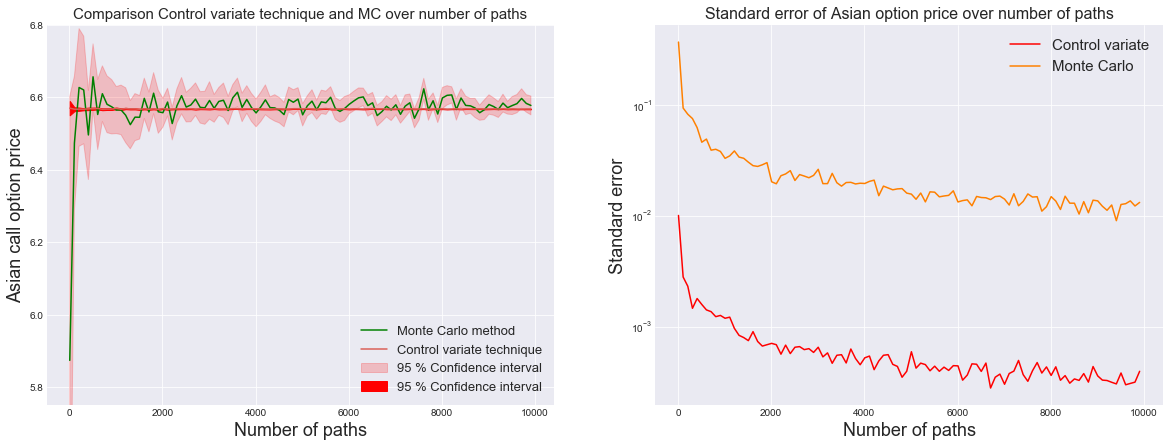

In [535]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.plot(simlist,simmeanmonte,label='Monte Carlo method',color='green')
plt.fill_between(simlist,y1=simmeanmonte+(1.96*np.array(simstdmonte)/np.sqrt(50)),y2=simmeanmonte-(1.96*np.array(simstdmonte)/np.sqrt(50)),color='red',label='95 % Confidence interval',alpha=0.2)
plt.plot(simlist,simmean,label='Control variate technique')
plt.fill_between(simlist,y1=simmean+(1.96*np.array(simstd)/np.sqrt(50)),y2=simmean-(1.96*np.array(simstd)/np.sqrt(50)),color='red',label='95 % Confidence interval')
plt.title('Comparison Control variate technique and MC over number of paths',size=15)
plt.xlabel('Number of paths',size=18)
plt.ylabel('Asian call option price',size=18)
plt.legend(fontsize=13)
plt.ylim(5.75,6.8)
plt.subplot(1,2,2)
plt.title('Standard error of Asian option price over number of paths',size=16)
plt.plot(simlist,np.array(simstd)/np.sqrt(50),label='Control variate',color='red')
plt.plot(simlist,np.array(simstdmonte)/np.sqrt(50),label='Monte Carlo',color='#ff8000')
plt.xlabel('Number of paths',size=18)
plt.ylabel('Standard error',size=18)
plt.legend(fontsize=15)
plt.yscale('log')
plt.savefig('Asian_control_changepaths.jpg',dpi=200,bbox_inches='tight')
plt.show()

# Change_time_points

In [542]:
Nlist=np.arange(10,10000,100)
Ncontrol=[]
for i in Nlist:
    k=[control_variate_asian(N=i)[0] for h in range(50)]
    Ncontrol.append(k)

In [544]:
Ncontrol_1=[np.mean(Ncontrol[i]) for i in range(len(Ncontrol))]
Ncontrol_1std=[np.std(Ncontrol[i]) for i in range(len(Ncontrol))]

In [168]:
Nlist=np.arange(10,10000,100)
Ncontrol=[]
Nmonte=[]
for i in Nlist:
    k=[control_variate_asian(N=i)[0] for h in range(50)]
    z=[control_variate_asian(N=i)[1] for h in range(50)]
    Ncontrol.append(k)
    Nmonte.append(z)

In [213]:
Ncontrol_1=[np.mean(Ncontrol[i]) for i in range(len(Ncontrol))]
Ncontrolmonte_1=[np.mean(Nmonte[i]) for i in range(len(Nmonte))]
Ncontrol_1std=[np.std(Ncontrol[i]) for i in range(len(Ncontrol))]
Ncontrolmonte_1std=[np.std(Nmonte[i]) for i in range(len(Nmonte))]

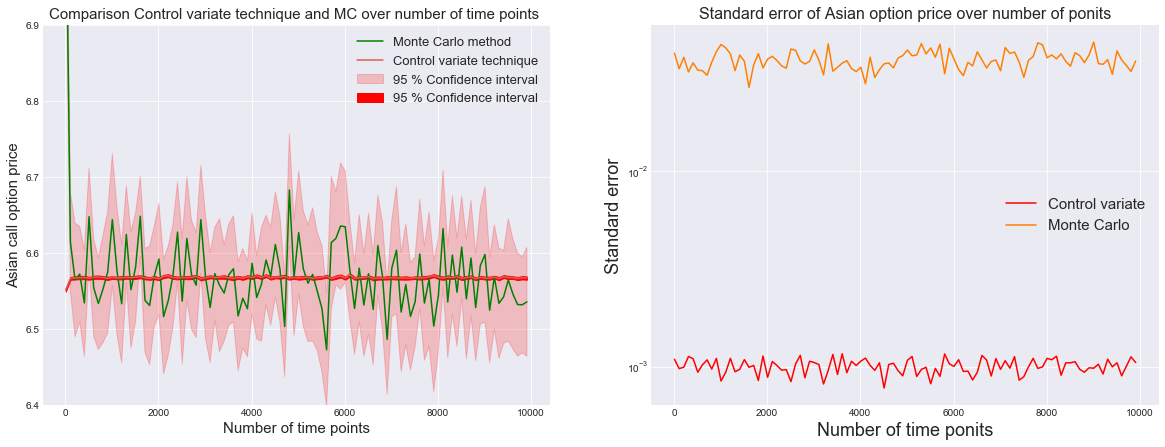

In [546]:


plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.plot(Nlist,Ncontrolmonte_1,label='Monte Carlo method',color='green')
plt.fill_between(Nlist,y1=Ncontrolmonte_1+(1.96*np.array(Ncontrolmonte_1std)/np.sqrt(50)),y2=Ncontrolmonte_1-(1.96*np.array(Ncontrolmonte_1std)/np.sqrt(50)),color='red',label='95 % Confidence interval',alpha=0.2)
plt.plot(Nlist,Ncontrol_1,label='Control variate technique')
plt.fill_between(Nlist,y1=Ncontrol_1+(1.96*np.array(Ncontrol_1std)/np.sqrt(50)),y2=Ncontrol_1-(1.96*np.array(Ncontrol_1std)/np.sqrt(50)),color='red',label='95 % Confidence interval')
plt.title('Comparison Control variate technique and MC over number of time points ',size=15)
plt.xlabel('Number of time points',size=15)
plt.ylabel('Asian call option price',size=15)
plt.legend(fontsize=13)
plt.ylim(6.4,6.9)
plt.subplot(1,2,2)
plt.title('Standard error of Asian option price over number of ponits',size=16)
plt.plot(Nlist,np.array(Ncontrol_1std)/np.sqrt(50),label='Control variate',color='red')
plt.plot(Nlist,np.array(Ncontrolmonte_1std)/np.sqrt(50),label='Monte Carlo',color='#ff8000')
plt.xlabel('Number of time ponits',size=18)
plt.ylabel('Standard error',size=18)
plt.legend(fontsize=15)
plt.yscale('log')
plt.savefig('Asian_control_changetimepoints.jpg',dpi=200,bbox_inches='tight')
plt.show()

# Change_strike_price

In [452]:
Klist=np.arange(90,120,2)
kcontrol=[]
Kmonte=[]
for i in Klist:
    k=[control_variate_asian(K=i)[0] for h in range(50)]
    z=[control_variate_asian(K=i)[1] for h in range(50)]
    kcontrol.append(k)
    Kmonte.append(z)

In [453]:
kcontrol_1=[np.mean(kcontrol[i]) for i in range(len(kcontrol))]
kmonte_1=[np.mean(Kmonte[i]) for i in range(len(Kmonte))]
kcontrol_1std=[np.std(kcontrol[i]) for i in range(len(kcontrol))]
kmonte_1std=[np.std(Kmonte[i]) for i in range(len(Kmonte))]

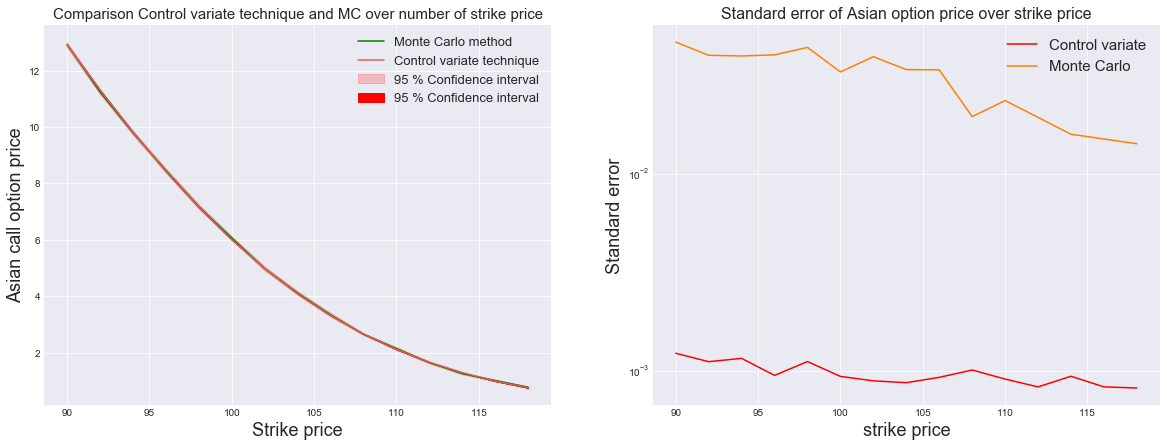

In [537]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.plot(Klist,kmonte_1,label='Monte Carlo method',color='green')
plt.fill_between(Klist,y1=kmonte_1+(1.96*np.array(kmonte_1std)/np.sqrt(50)),y2=kmonte_1-(1.96*np.array(kmonte_1std)/np.sqrt(50)),color='red',label='95 % Confidence interval',alpha=0.2)
plt.plot(Klist,kcontrol_1,label='Control variate technique')
plt.fill_between(Klist,y1=kcontrol_1+(1.96*np.array(kcontrol_1std)/np.sqrt(50)),y2=kcontrol_1-(1.96*np.array(kcontrol_1std)/np.sqrt(50)),color='red',label='95 % Confidence interval')
plt.title('Comparison Control variate technique and MC over number of strike price',size=15)
plt.xlabel('Strike price',size=18)
plt.ylabel('Asian call option price',size=18)
plt.legend(fontsize=13)
# plt.savefig('Asian_change_strikeprice.jpg',dpi=200,bbox_inches='tight')
# plt.ylim(6.4,6.9)
plt.subplot(1,2,2)
plt.title('Standard error of Asian option price over strike price',size=16)
plt.plot(Klist,np.array(kcontrol_1std)/np.sqrt(50),label='Control variate',color='red')
plt.plot(Klist,np.array(kmonte_1std)/np.sqrt(50),label='Monte Carlo',color='#ff8000')
plt.xlabel('strike price',size=18)
plt.ylabel('Standard error',size=18)
plt.legend(fontsize=15)
plt.yscale('log')
plt.savefig('Asian_change_strikeprice.jpg',dpi=200,bbox_inches='tight')
plt.show()

# Change Sigma

In [449]:
sigmalist=np.arange(0.1,1,0.1)
sigmacontrol=[]
sigmamonte=[]
for i in sigmalist:
    k=[control_variate_asian(sigma=i)[0] for h in range(50)]
    z=[control_variate_asian(sigma=i)[1] for h in range(50)]
    sigmacontrol.append(k)
    sigmamonte.append(z)

In [450]:
sigmacontrol_1=[np.mean(sigmacontrol[i]) for i in range(len(sigmacontrol))]
sigmamonte_1=[np.mean(sigmamonte[i]) for i in range(len(sigmamonte))]
sigmacontrol_1std=[np.std(sigmacontrol[i]) for i in range(len(sigmacontrol))]
sigmamonte_1std=[np.std(sigmamonte[i]) for i in range(len(sigmamonte))]

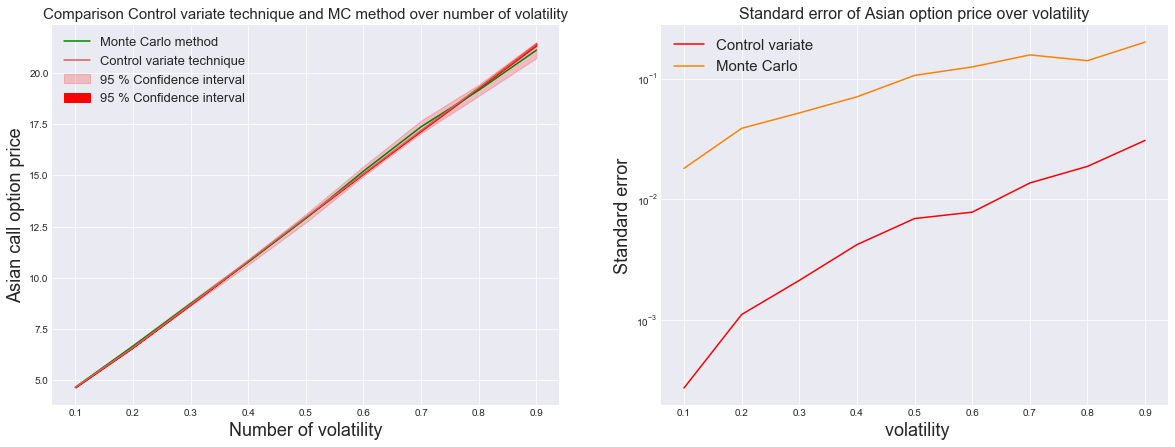

In [538]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.plot(sigmalist,sigmamonte_1,label='Monte Carlo method',color='green')
plt.fill_between(sigmalist,y1=sigmamonte_1+(1.96*np.array(sigmamonte_1std)/np.sqrt(50)),y2=sigmamonte_1-(1.96*np.array(sigmamonte_1std)/np.sqrt(50)),color='red',label='95 % Confidence interval',alpha=0.2)
plt.plot(sigmalist,sigmacontrol_1,label='Control variate technique')
plt.fill_between(sigmalist,y1=sigmacontrol_1+(1.96*np.array(sigmacontrol_1std)/np.sqrt(50)),y2=sigmacontrol_1-(1.96*np.array(sigmacontrol_1std)/np.sqrt(50)),color='red',label='95 % Confidence interval')
plt.title('Comparison Control variate technique and MC method over number of volatility',size=15)
plt.xlabel('Number of volatility',size=18)
plt.ylabel('Asian call option price',size=18)
plt.legend(fontsize=13)
plt.subplot(1,2,2)
plt.title('Standard error of Asian option price over volatility',size=16)
plt.plot(sigmalist,np.array(sigmacontrol_1std)/np.sqrt(50),label='Control variate',color='red')
plt.plot(sigmalist,np.array(sigmamonte_1std)/np.sqrt(50),label='Monte Carlo',color='#ff8000')
plt.xlabel(' volatility',size=18)
plt.ylabel('Standard error',size=18)
plt.legend(fontsize=15)
plt.yscale('log')
# plt.ylim(6.4,6.9)
plt.savefig('Asian_change_volatility.jpg',dpi=200,bbox_inches='tight')
plt.show()